**Student Name:** B M Nafis Fuad

**Student ID:** 274502

# Assignment #2

# In This assignment you are asked to read a data which include 48505 articles (Documents). Then fint the most similar documents using Locality Sensitive Hashing. Follow the lecture covering this topic step by step.

In [1]:
import numpy as np
import pandas as pd
import json
import re
import string
import matplotlib
import matplotlib.pyplot as plt
import copy
import itertools

import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import collections
from collections import Counter

import operator
from operator import itemgetter

import random
from random import randint

from scipy.sparse import csr_matrix

## 1. Data is available in Json format and you need to read it. 'https://www.ux.uis.no/~vsetty/data/assignment2_aricles.json' (5 points)

In [2]:
dataset =  'https://www.ux.uis.no/~vsetty/data/assignment2_aricles.json'
articles = pd.read_json(dataset, orient='records', encoding="utf-8")
articles

,article_id,Title,Content
0,0,Tikcro enters into research and license agreem...,Tikcro enters into research and license agreem...
1,1,Facebook Friend Request Nearly Cost One North ...,A North Carolina woman is trying to warn other...
2,2,Amlin plc UK Regulatory Announcement: Total Vo...,LONDON--(BUSINESS WIRE)--\n\nAMLIN plc\n\nTOTA...
3,3,Khaleda asks for security,Khaleda asks for security\n\n\n\nBNP Chairpers...
4,4,Liberian Health Clinics Reopen Slowly with Ren...,Liberian Health Clinics Reopen Slowly with Ren...
...,...,...,...
48500,48500,Winter Jam concert expects to draw crowd,Korey Cooper and John Cooper of Skillet perfor...
48501,48501,"Figs, dates sweeten treats",2 1/4 cups all-purpose flour\n\n1/3 cup confec...
48502,48502,Annie Lessard Resigns As Bloc Quebecois Vice-P...,ADVERTISEMENT\n\nMONTREAL - The vice-president...
48503,48503,Daily Times Nigeria Newspaper – Breaking News,There are no dull moments in our country just ...


## 2. Shingle the documents (10 points)
### Tips:
* Use string package to cleanup the articles e.g, str.maketrans('', '', string.
punctuation)
* It is better to convert text to lower case that way you get fewer n-grams
* apply ngrams(x.split(), n) using ngrams from nltk on the content + title for computing n-grams, for this data n = 2 is suffcient
  * You can use n-gram at word level for this task
  * try with different n-gram values 
  * You can use ngrams from nltk for this

In [3]:
def get_ngrams(text,n):
    # Clean up the text by removing punctuation and converting to lowercase
    translator = str.maketrans('', '', string.punctuation)
    text_clean = text.lower().translate(translator) #methods to clean up the text by converting to lowercase and removing punctuation

    # Tokenize the text into individual words
    words = text_clean.split() #method to tokenize the cleaned text into individual words

    # Use nltk to generate n-grams of size n
    ngrams_list = list(nltk.ngrams(words, n))
    # pass these words to the nltk.ngrams() function to generate the n-grams. 
    # The resulting n-grams are stored in a list using the list() function

    return ngrams_list

In [4]:
# Concatenate the 'Title' and 'Content' columns of the dataframe into a new 'Combined Text' column
articles['Combined Text'] = articles['Title'] + ' ' + articles['Content']
# Replace numbers in new Combined Text Columns
articles['Combined Text'].replace('\d+', '', regex=True,inplace=True)

In [5]:
# Apply the 'get_ngrams' function to the 'Combined Text' column of the dataframe to generate n-grams
articles['ngrams'] = articles['Combined Text'].apply(lambda x: get_ngrams(x, n=2))

In [6]:
articles

,article_id,Title,Content,Combined Text,ngrams
0,0,Tikcro enters into research and license agreem...,Tikcro enters into research and license agreem...,Tikcro enters into research and license agreem...,"[(tikcro, enters), (enters, into), (into, rese..."
1,1,Facebook Friend Request Nearly Cost One North ...,A North Carolina woman is trying to warn other...,Facebook Friend Request Nearly Cost One North ...,"[(facebook, friend), (friend, request), (reque..."
2,2,Amlin plc UK Regulatory Announcement: Total Vo...,LONDON--(BUSINESS WIRE)--\n\nAMLIN plc\n\nTOTA...,Amlin plc UK Regulatory Announcement: Total Vo...,"[(amlin, plc), (plc, uk), (uk, regulatory), (r..."
3,3,Khaleda asks for security,Khaleda asks for security\n\n\n\nBNP Chairpers...,Khaleda asks for security Khaleda asks for sec...,"[(khaleda, asks), (asks, for), (for, security)..."
4,4,Liberian Health Clinics Reopen Slowly with Ren...,Liberian Health Clinics Reopen Slowly with Ren...,Liberian Health Clinics Reopen Slowly with Ren...,"[(liberian, health), (health, clinics), (clini..."
...,...,...,...,...,...
48500,48500,Winter Jam concert expects to draw crowd,Korey Cooper and John Cooper of Skillet perfor...,Winter Jam concert expects to draw crowd Korey...,"[(winter, jam), (jam, concert), (concert, expe..."
48501,48501,"Figs, dates sweeten treats",2 1/4 cups all-purpose flour\n\n1/3 cup confec...,"Figs, dates sweeten treats / cups all-purpose...","[(figs, dates), (dates, sweeten), (sweeten, tr..."
48502,48502,Annie Lessard Resigns As Bloc Quebecois Vice-P...,ADVERTISEMENT\n\nMONTREAL - The vice-president...,Annie Lessard Resigns As Bloc Quebecois Vice-P...,"[(annie, lessard), (lessard, resigns), (resign..."
48503,48503,Daily Times Nigeria Newspaper – Breaking News,There are no dull moments in our country just ...,Daily Times Nigeria Newspaper – Breaking News ...,"[(daily, times), (times, nigeria), (nigeria, n..."


## 3. Convert n-grams into binary vector representation for each document. You can do some optimzations if the matrix is too big. (10 points)
* For example,

  * Select top 10000 most frequent n-grams.
  * You may also try smaller values of n (like 2 or 3) which result in fewer n-grams.
  * Finally, you can also try sparse matrix representation. Like csr_matrix from scipy.sparse. It works even with full vocabulary.
    * Given a list of n-grams for each document, see how to builid a sparse matrix here https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

In [7]:
def getFrequentNgrams(articles):
    # Select most frequent n-grams using count method
    ngrams = []
    for i in range(len(articles)):
        ngrams.extend(articles.iloc[i]['ngrams'])
    # Count the n-grams
    ngram_counts = {}
    for ngram in ngrams:
        if ngram in ngram_counts:
            ngram_counts[ngram] += 1
        else:
            ngram_counts[ngram] = 1
    # Sort the n-grams by frequency and return the top 10000
    sorted_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)[:10000]
    most_frequent_ngrams = [ngram for ngram, count in sorted_ngrams]

    return most_frequent_ngrams

In [8]:
top_sorted_ngrams = getFrequentNgrams(articles)
top_sorted_ngrams

[('of', 'the'),
 ('in', 'the'),
 ('to', 'the'),
 ('on', 'the'),
 ('for', 'the'),
 ('at', 'the'),
 ('and', 'the'),
 ('from', 'the'),
 ('to', 'be'),
 ('in', 'a'),
 ('with', 'the'),
 ('that', 'the'),
 ('by', 'the'),
 ('of', 'a'),
 ('will', 'be'),
 ('said', 'the'),
 ('according', 'to'),
 ('he', 'said'),
 ('as', 'a'),
 ('to', 'a'),
 ('has', 'been'),
 ('is', 'a'),
 ('have', 'been'),
 ('more', 'than'),
 ('for', 'a'),
 ('with', 'a'),
 ('it', 'is'),
 ('one', 'of'),
 ('as', 'the'),
 ('and', 'a'),
 ('the', 'new'),
 ('it', 'was'),
 ('the', 'first'),
 ('is', 'the'),
 ('the', 'us'),
 ('he', 'was'),
 ('the', 'world'),
 ('on', 'a'),
 ('part', 'of'),
 ('at', 'a'),
 ('the', 'country'),
 ('over', 'the'),
 ('about', 'the'),
 ('the', 'united'),
 ('the', 'state'),
 ('a', 'new'),
 ('this', 'year'),
 ('was', 'a'),
 ('new', 'year'),
 ('number', 'of'),
 ('after', 'the'),
 ('into', 'the'),
 ('is', 'not'),
 ('on', 'wednesday'),
 ('would', 'be'),
 ('new', 'years'),
 ('had', 'been'),
 ('want', 'to'),
 ('the', 'same

In [9]:
def getBinaryMatrix(top_ngrams):
    # Create a vocabulary of the top n-grams
    vocab = {ngram: i for i, ngram in enumerate(top_ngrams)}

    # Create a binary vector representation of the n-grams for each document
    matrix = np.zeros((len(articles), len(vocab)), dtype=np.int8)
    for i, doc_ngrams in enumerate(articles['ngrams']):
        for ngram in doc_ngrams:
            if ngram in vocab:
                matrix[i, vocab[ngram]] = 1

    binary_matrix = np.transpose(csr_matrix(matrix).toarray())
    
    return binary_matrix

In [10]:
binary_matrix = getBinaryMatrix(top_sorted_ngrams)
binary_matrix

array([[1, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [11]:
binary_matrix.shape

(10000, 48505)

## 4. We need hash function that maps integers 0, 1, . . . , k − 1 to bucket numbers 0 through k − 1. It might be impossible to avoid collisions but as long as the collions are too many it won't matter much. (10 points)
* The simplest would be using the builtin hash() function, it can be for example, hash(rownumber) % Numberofbuckets
* You can generate several of these hash functions by xoring a random integer (hash(rownumber)^randint) % Numberofbuckets
* It can also be a as simple as (rownumber * randint) % Numberofbuckets

In [12]:
def getHashFunctionValues(numrows, numhashfunctions):
    """
    This function generates hash functions to map integer keys to bucket indices.
    The input is the number of rows and the number of desired hash functions.
    The output is a matrix with hash values.
    """
    hash_value_matrix = []

    for _ in range(numhashfunctions):
        # Generate a random integer to use for XOR-ing
        rand_int = randint(0, numrows)
        # Generate a hash function as a lambda function
        hash_func = lambda row: (hash(row) ^ rand_int) % numrows
        # Apply the hash function to each row and store the results in a list
        hash_vals = [hash_func(row) for row in range(numrows)]
        # Add the hash values to the hash matrix
        hash_value_matrix.append(hash_vals)

    return hash_value_matrix
    

In [13]:
hash_matrix = np.array(getHashFunctionValues(numrows = binary_matrix.shape[0], numhashfunctions = 100))
hash_matrix

array([[7406, 7407, 7404, ..., 5331, 5328, 5329],
       [7541, 7540, 7543, ..., 4968, 4971, 4970],
       [7347, 7346, 7345, ..., 5294, 5293, 5292],
       ...,
       [2169, 2168, 2171, ..., 2148, 2151, 2150],
       [ 171,  170,  169, ...,  150,  149,  148],
       [4897, 4896, 4899, ..., 3356, 3359, 3358]])

## 5. Compute minhash following the faster algorithm from the lecture (10 points)

In [14]:
def getMinHashSignatureMatrix(binary_matrix, hash_val_matrix):
    # Create an empty minhash signature matrix 
    # with same number of rows as the number of hash functions
    # with same number of columns as the binary matrix
    minhash_sign_matrix = np.full((hash_val_matrix.shape[0], binary_matrix.shape[1]),np.inf) 
    # Iterate over each row in the binary matrix
    for x in range(0,binary_matrix.shape[0]):
        # Get the indices of the columns in the current row that have a value of 1
        for y in np.where(binary_matrix[x]==1)[0]:
            # Iterate over each row in the hash value matrix and update the corresponding value in the minhash signature matrix
            for z in range(hash_val_matrix.shape[0]):
                # If the value in the minhash signature matrix is infinite or greater than the corresponding value in the hash value matrix
                # update the value in the minhash signature matrix with the corresponding value in the hash value matrix
                if minhash_sign_matrix[z][y] == np.inf or minhash_sign_matrix[z][y] > hash_val_matrix[z][x]:
                    minhash_sign_matrix[z][y] = hash_val_matrix[z][x]
    # Return the completed minhash signature matrix
    return minhash_sign_matrix


In [15]:
min_hash = getMinHashSignatureMatrix(binary_matrix, hash_matrix)
min_hash

array([[ 489.,  259., 3048., ...,  250., 2077.,   24.],
       [ 114.,   18., 2675., ...,  224., 2438.,    9.],
       [ 436.,  350., 2997., ...,  167., 2112.,   69.],
       ...,
       [ 105.,   12.,  254., ...,   76.,  104.,  709.],
       [  35.,   11.,   69., ...,   12.,   12.,  142.],
       [  10.,   67.,   66., ...,   13.,   79.,  110.]])

## 6. Hash signature bands into buckets. Find a way to combine all the  signature values in a band and hash them into a number of buckets ususally very high. (10 points)
* Easiest way is to add all the signature values in the bucket and use a similar hash function like before
* You should use the same hash function for all bands. And all documents ending up in same bucket for at least one band are considered as candidate pairs.

In [16]:
def getLSH(signature_matrix, num_bands, num_buckets):
    lsh_table = {}
    bands = int(signature_matrix.shape[0] / num_bands)
    for i in range(num_bands):
        for j in range(signature_matrix.shape[1]):
            # Hash the values in the current band using a hash function
            # that maps to one of the num_buckets buckets
            band_values = signature_matrix[i * bands: (i + 1) * bands, j]
            hash_value = hash(tuple(band_values)) % num_buckets
            
            # Add the column index to the set of columns associated with this hash value
            if hash_value not in lsh_table:
                lsh_table[hash_value] = set()
            lsh_table[hash_value].add(j)
    return lsh_table


In [17]:
lsh = getLSH(min_hash, 10, 1000000)
lsh

{965891: {0, 7273},
 848117: {1, 6850},
 750225: {2},
 278361: {3, 37755},
 458824: {4,
  6851,
  9284,
  10196,
  13457,
  14421,
  25049,
  30591,
  34930,
  35255,
  36264,
  37804,
  38534,
  41239,
  44552},
 551038: {5, 11933, 14699, 28190, 30071, 36335, 36576, 48117},
 203634: {6},
 207467: {7},
 688022: {8},
 891850: {9, 825, 20155, 34617, 34816, 45244},
 35556: {10},
 49628: {11},
 1729: {12,
  269,
  475,
  1870,
  2508,
  2604,
  2978,
  3308,
  3344,
  3569,
  3583,
  3588,
  3608,
  3697,
  3756,
  4208,
  4423,
  4446,
  4833,
  5273,
  5342,
  5687,
  5751,
  6057,
  6060,
  6521,
  6616,
  6815,
  7280,
  7398,
  8407,
  8584,
  8587,
  9026,
  9550,
  10363,
  10402,
  11660,
  11828,
  12963,
  13091,
  14192,
  14382,
  14425,
  14466,
  15061,
  15108,
  15832,
  16301,
  16425,
  16847,
  17124,
  17311,
  17574,
  18573,
  19868,
  19907,
  20352,
  20553,
  21157,
  21195,
  21481,
  21508,
  21712,
  22163,
  22284,
  22386,
  23433,
  23697,
  23972,
  23994,
 

## 7. Tune parameters to make sure the threshold is appropriate. (10 points)
* plot the probability of two similar items falling in same bucket for different threshold values

In [24]:
def plotProbability(b, r):
    # Define a function to calculate threshold based on s, b, and r values
    def calcThres(s, b, r):
        return 1 - ((1 - ((s) ** r)) ** b)
    
    # Define a list of Jaccard similarity threshold values to test
    s = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
    # Calculate the probability of two documents falling into the same bucket for each s value
    values = [calcThres(s[i], b, r) for i in range(len(s))]
    
    # Plot the values with the given b value as the label
    plt.plot(values, label=b)
    plt.xlabel("Jaccard Similarity of Documents")
    plt.ylabel("Probability of Becoming a Candidate")


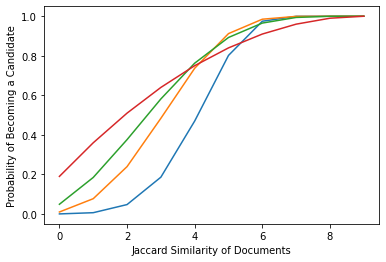

In [26]:
b = [20, 10, 5, 2]
r = [5, 3, 2, 1]

for i in range(0, len(b)):
    plotProbability(b[i], r[i])

## 8. Choose the best parameters and get nearest neighbors of each articles (20 points)
* Jaccard Similarity
* convert hash table into dictionary of article ids and its other articles that hashed in at least 1 same bucket

In [23]:
def getJaccardSimilarityScore(C1, C2):
    # Compute the intersection and union of the two sets of columns
    intersection = np.sum(np.bitwise_and(C1, C2))
    union = np.sum(np.bitwise_or(C1, C2))
    
    # Compute the Jaccard similarity score by dividing the intersection by the union
    jaccard_similarity = intersection / union
    
    return float(jaccard_similarity)
    

In [28]:
# convert hash table into dictionary of article ids 
# and its other articles that hashed in at least 1 same bucket

# Initialize an empty dictionary to store the nearest neighbors
nearest_neighbors = {}

# Loop over each bucket and the set of article ids hashed into that bucket
for bucket, ids in lsh.items():
    
    # Loop over each article id in the set of ids
    for article_id in ids:
        
        # If the article id is not already in the dictionary, add it with an empty set as its value
        if article_id not in nearest_neighbors:
            nearest_neighbors[article_id] = set()
        
        # Update the set of nearest neighbors for the article id with the set of ids in the current bucket, excluding itself
        nearest_neighbors[article_id].update([i for i in ids if i != article_id])

        

## 9. Write the nearest neibhors of each document to submissions.csv (comma separated, first column is the current document followed by a list of nearest neighbors) file and get the score (10 points)

In [29]:
# Remove the neighbors in same buckets but have similarity score < threshold s
n_copy = copy.deepcopy(nearest_neighbors)
submission_id = []
submission_nid = []
s = 0.5
for article_id, neighbor_ids in n_copy.items():
    for nid in neighbor_ids:
        score = getJaccardSimilarityScore(binary_matrix[:, article_id], binary_matrix[:, nid])
        if score < s:
           nearest_neighbors[article_id].remove(nid)
        else:
            # add to submission result
            submission_id.append(article_id)
            submission_nid.append(nid)
            

C:\Users\USER\AppData\Local\Temp\ipykernel_19700\3893298912.py:7: RuntimeWarning: invalid value encountered in long_scalars
  jaccard_similarity = intersection / union


In [30]:
data = pd.DataFrame()
data['article_id'] = submission_id
data['neighbor_id'] = submission_nid
data.sort_values(by=['article_id', 'neighbor_id'], inplace=True)

In [31]:
data.head(100)

,article_id,neighbor_id
14,4,6851
15,4,9284
22,4,10196
20,4,13457
23,4,14421
...,...,...
931,12,20138
1009,12,20352
893,12,20553
1022,12,20887


In [32]:
data.to_csv('submission.csv') 